## Case de IA - Customer churn

<p align='center'>
    <img src='https://www.questionpro.com/blog/wp-content/uploads/2018/03/churn.png'>
</p>

Neste case básico de IA, vamos analisar um dataset de churn de clientes de uma empresa de telecomunicações. O objetivo é criar um modelo de Machine Learning que seja capaz de prever se um cliente irá ou não cancelar seu plano.


O objetivo é que você tenha seu primeiro contato com um problema de Machine Learning, que você consiga entender como é mais ou menos o fluxo de trabalho e, principalmente, vá aprendendo os principais conceitos conforme for realizando.


Ao longo do case passaremos por tópicos como:

1. Visualização, análise e tratamento de dados
2. Split dos dados em treino e teste
3. Padronização dos dados
4. Criação de um modelo de Machine Learning
5. Avaliação do modelo
6. Otimização dos hiperparâmetros do modelo


## Referências gerais:
- https://www.datacamp.com/tutorial/introduction-machine-learning-python
- https://app.datacamp.com/learn/courses/machine-learning-with-scikit-learn
- Livro: Introduction to Machine Learning with Python (Capítulo 2) - https://drive.google.com/drive/u/1/folders/10VdWCaR7qZ40K9rC5gWviKWMkMPzK8FB

Mais referências ao longo do case

### 0 - Antes de tudo...

Existem muitas formas de se resolver um problema de Machine Learning, no entanto, o **workflow** a ser seguido geralmente segue essa estrutura:
<p align='center'>
    <img src='https://editor.analyticsvidhya.com/uploads/80329Roadmap.PNG'>
</p>

Assim, comece importando as bibliotecas básicas, e carregando o dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\natal\Downloads\Case IA\Churn_train.csv')

In [3]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


### 1 - Data Prep

Provavelmente, a etapa mais importante do processo. É a etapa de entendimento do problema a ser resolvido, entendimento dos dados que você possui e, principalmente, tratamento desses dados para poder extrair o máximo de informação possível.

Veja aqui algumas referências para um bom Data Prep:
- https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/
- https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e

O objetivo aqui é verficar se os dados estão certinhos para serem utilizados em modelos. Assim,

- Verifique o tipo das variáveis (existem números como strings, por exemplo?)  
- Verifique se há valores nulos
- Verifique se há valores duplicados
- Verifique a presença de outliers (aqui pode ser bem útil plotar gráficos de distribuição das variáveis)
- Qual coluna é a variável *target* (aquilo que queremos prever)?
- Quais features são necessárias e quais não são?

In [4]:
#verificar tipos de variáveis
df.dtypes

CustomerID           float64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object

In [5]:
#média de valores nulos de cada coluna
df.isnull().sum().sort_values(ascending=False)/df.shape[0]

CustomerID           0.000002
Age                  0.000002
Gender               0.000002
Tenure               0.000002
Usage Frequency      0.000002
Support Calls        0.000002
Payment Delay        0.000002
Subscription Type    0.000002
Contract Length      0.000002
Total Spend          0.000002
Last Interaction     0.000002
Churn                0.000002
dtype: float64

In [6]:
#vimos que temos pouquissimo - vamos substituir pela média dos valores
# vamos usar ML para isso
from sklearn.impute import SimpleImputer


In [7]:
colunas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()

# Criar e ajustar o SimpleImputer apenas para as colunas numéricas
si = SimpleImputer(missing_values=np.nan, strategy="median")
si.fit(df[colunas_numericas])

# Preencher os valores ausentes apenas nas colunas numéricas
df[colunas_numericas] = si.transform(df[colunas_numericas])

In [8]:
#os valores numéricos não tem mais valores nulos
df.isnull().sum().sort_values(ascending=False)/df.shape[0]

Gender               0.000002
Subscription Type    0.000002
Contract Length      0.000002
CustomerID           0.000000
Age                  0.000000
Tenure               0.000000
Usage Frequency      0.000000
Support Calls        0.000000
Payment Delay        0.000000
Total Spend          0.000000
Last Interaction     0.000000
Churn                0.000000
dtype: float64

In [9]:
#vamos olhar pra valores não numéricos - vamos por a moda

si_categorical = SimpleImputer(strategy="most_frequent")
df[["Gender", "Subscription Type","Contract Length"]] = si_categorical.fit_transform(df[["Gender", "Subscription Type","Contract Length"]])

In [10]:
#agora não temos mais valores nulos
df.isnull().sum().sort_values(ascending=False)/df.shape[0]

CustomerID           0.0
Age                  0.0
Gender               0.0
Tenure               0.0
Usage Frequency      0.0
Support Calls        0.0
Payment Delay        0.0
Subscription Type    0.0
Contract Length      0.0
Total Spend          0.0
Last Interaction     0.0
Churn                0.0
dtype: float64

In [11]:
#vamos ver se tem valores duplicados
duplicados = df.duplicated().sum()
print(duplicados)

0


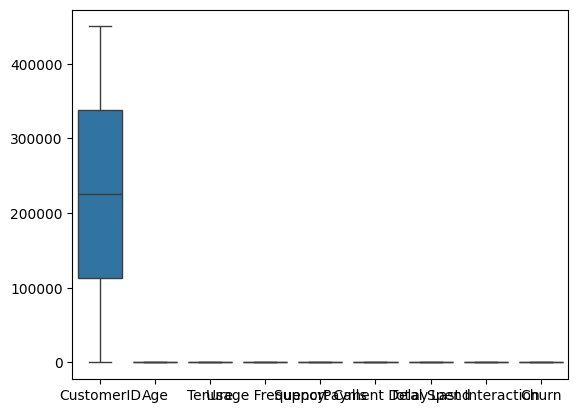

In [12]:
#ver outliers por meio de boxplot
sns.boxplot(data=df)
plt.show()

In [13]:
# vamos usar o Z-Score para medir a quantidade de outliers
#Calcular o Z-Score pode ajudar a identificar pontos que estão longe da média em termos de desvios padrão. 
from scipy.stats import zscore

# Selecionar apenas colunas numéricas
colunas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()

# Calcular escore Z apenas para colunas numéricas
z_scores = zscore(df[colunas_numericas])

# Identificar outliers usando um limiar (por exemplo, 3)
outliers = (abs(z_scores) > 3).all(axis=1)

# Exibir linhas com outliers
print(df[outliers])

Empty DataFrame
Columns: [CustomerID, Age, Gender, Tenure, Usage Frequency, Support Calls, Payment Delay, Subscription Type, Contract Length, Total Spend, Last Interaction, Churn]
Index: []


In [14]:
# variável target: Churn, queremos saber a evasão dos customers

1. Análise de Correlação:
Use a matriz de correlação para entender a relação linear entre as características e a variável alvo. Características altamente correlacionadas com a variável alvo são geralmente mais informativas.s


In [15]:
# Matriz de correlação
colunas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = df[colunas_numericas].corr()
correlation_matrix

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
CustomerID,1.000000,-0.181977,0.044129,0.038455,-0.482894,-0.262029,0.359289,-0.125356,-0.839364
Age,-0.181977,1.000000,-0.011630,-0.007190,0.158451,0.061738,-0.084684,0.028980,0.218394
Tenure,0.044129,-0.011630,1.000000,-0.026800,-0.027640,-0.016588,0.019006,-0.006903,-0.051919
Usage Frequency,0.038455,-0.007190,-0.026800,1.000000,-0.022013,-0.014470,0.018631,-0.004662,-0.046101
Support Calls,-0.482894,0.158451,-0.027640,-0.022013,1.000000,0.162889,-0.221594,0.077685,0.574266
Payment Delay,-0.262029,0.061738,-0.016588,-0.014470,0.162889,1.000000,-0.121044,0.042708,0.312129
Total Spend,0.359289,-0.084684,0.019006,0.018631,-0.221594,-0.121044,1.000000,-0.056890,-0.429354
Last Interaction,-0.125356,0.028980,-0.006903,-0.004662,0.077685,0.042708,-0.056890,1.000000,0.149616
Churn,-0.839364,0.218394,-0.051919,-0.046101,0.574266,0.312129,-0.429354,0.149616,1.000000


In [16]:
#podemos ver que a variável mais correlacionada é support calls, seguido por payment delay, age e 
#não são mt correlacionados customer id, e total spend
#dá pra dropar o customer id
#existem outras técnicas para melhorar o modelo - com ML - acho que terei que fazer isso na parte final

In [17]:
#dropo customer id?

### Encoding

Muitos algoritmos não conseguem trabalhar só com dados numéricos. Assim, um tratamento necessário é a transformação de variáveis categóricas em numéricas. 

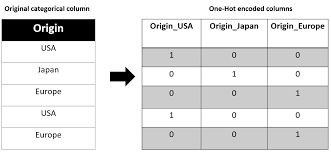

São formas de encoding mais comuns:
- Dummy encoding
- One-hot encoding
- Label encoding

Pesquise sobre esses métodos e veja qual a forma mais adequada para as variáveis categóricas

In [18]:
#variáveis categóricas quais são?
df.head()
#gender - feminino e masculino
#subscription type - standard/basic...
#contract length - 

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [19]:
#mão tem ordem
df['Contract Length'].unique()

array(['Annual', 'Monthly', 'Quarterly'], dtype=object)

In [20]:
# tem uma ordem
df['Subscription Type'].unique()

array(['Standard', 'Basic', 'Premium'], dtype=object)

1. Label Encoding:

O label encoding envolve atribuir um número inteiro a cada categoria única na variável categórica. Cada categoria recebe um rótulo inteiro único. Essa abordagem pode ser útil quando há uma ordem natural nas categorias.
python
Copy code
from sklearn.preprocessing import LabelEncoder

No entanto, é importante ter cuidado ao usar label encoding em variáveis categóricas sem ordem específica, pois o algoritmo pode interpretar incorretamente uma relação de ordem que não existe.

In [21]:
#Vou usar para Subscription Type, pq tem ordem
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Categoria_LabelEncoded'] = le.fit_transform(df['Subscription Type'])

# Criar um dicionário para mapear rótulos para categorias desejadas
mapeamento_rotulos = {0: 0, 2: 1, 1: 2}

# Mapear os rótulos de volta para as categorias originais
df['Subscription_Type_LabelEncode'] = df['Categoria_LabelEncoded'].map(mapeamento_rotulos)
df.drop(columns='Categoria_LabelEncoded')

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Subscription_Type_LabelEncode
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0,1
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0,0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0,0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0,1
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0,2
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0,2
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0,1
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0,1


In [22]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Categoria_LabelEncoded,Subscription_Type_LabelEncode
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,2,1
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,0,0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,0,0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,2,1
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,0,0


In [23]:
#df[['Categoria_LabelEncoded','Subscription Type']]

2. One-Hot Encoding:

One-hot encoding cria colunas binárias separadas para cada categoria única na variável categórica. Cada coluna representa a presença ou ausência da categoria na observação. Essa abordagem é eficaz quando as categorias não têm uma ordem intrínseca.
python
Copy code
from sklearn.preprocessing import OneHotEncoder


O parâmetro drop='first' é usado para evitar a chamada "dummy variable trap", onde uma coluna pode ser prevista a partir das outras.

In [24]:
#vou usar para gender - mais usado em casos de só 2 categorias
from sklearn.preprocessing import OneHotEncoder

# Inicializar e aplicar OneHotEncoder
ohe = OneHotEncoder(sparse=False, drop=None)  # Remova o drop para incluir todas as categorias
one_hot_encoded = pd.DataFrame(ohe.fit_transform(df[['Gender']]))

# Renomear as colunas de forma significativa
column_names = [f"{col}_encoded" for col in ohe.get_feature_names_out(['Gender'])]
one_hot_encoded.columns = column_names

# Concatenar com o DataFrame original
df = pd.concat([df, one_hot_encoded], axis=1)
# Exibir o DataFrame resultante
df.head()


c:\Users\natal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Categoria_LabelEncoded,Subscription_Type_LabelEncode,Gender_Female_encoded,Gender_Male_encoded
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,2,1,1.0,0.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,0,0,1.0,0.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,0,0,1.0,0.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,2,1,0.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,0,0,0.0,1.0


In [25]:
# Inicializar e aplicar OneHotEncoder
#vou querer ter as 3 colunas para a análise de correlação
ohe = OneHotEncoder(sparse=False, drop=None)  # Remova o drop para incluir todas as categorias
one_hot_encoded = pd.DataFrame(ohe.fit_transform(df[['Contract Length']]))

# Renomear as colunas de forma significativa
column_names = [f"{col}_encoded" for col in ohe.get_feature_names_out(['Contract Length'])]
one_hot_encoded.columns = column_names

# Concatenar com o DataFrame original
df = pd.concat([df, one_hot_encoded], axis=1)
# Exibir o DataFrame resultante
df.head()

c:\Users\natal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Categoria_LabelEncoded,Subscription_Type_LabelEncode,Gender_Female_encoded,Gender_Male_encoded,Contract Length_Annual_encoded,Contract Length_Monthly_encoded,Contract Length_Quarterly_encoded
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,2,1,1.0,0.0,1.0,0.0,0.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,0,0,1.0,0.0,0.0,1.0,0.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,0,0,1.0,0.0,0.0,0.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,2,1,0.0,1.0,0.0,1.0,0.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,0,0,0.0,1.0,0.0,1.0,0.0


In [26]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Categoria_LabelEncoded,Subscription_Type_LabelEncode,Gender_Female_encoded,Gender_Male_encoded,Contract Length_Annual_encoded,Contract Length_Monthly_encoded,Contract Length_Quarterly_encoded
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,2,1,1.0,0.0,1.0,0.0,0.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,0,0,1.0,0.0,0.0,1.0,0.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,0,0,1.0,0.0,0.0,0.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,2,1,0.0,1.0,0.0,1.0,0.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,0,0,0.0,1.0,0.0,1.0,0.0


3. Dummy Encoding:

Dummy encoding é semelhante ao one-hot encoding, mas geralmente é usado para representar variáveis categóricas com mais de duas categorias. Ele cria colunas binárias para cada categoria, exceto uma (referência).
python
Copy code

In [27]:
# usar esse tipo para o subscription type - 
# df_dummies = pd.get_dummies(df['Contract Length'], drop_first=True)
# df = pd.concat([df, df_dummies], axis=1)
# #no caso anual é a referencia
#(ctrl+; para comentar tudo)

In [28]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Categoria_LabelEncoded,Subscription_Type_LabelEncode,Gender_Female_encoded,Gender_Male_encoded,Contract Length_Annual_encoded,Contract Length_Monthly_encoded,Contract Length_Quarterly_encoded
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,2,1,1.0,0.0,1.0,0.0,0.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,0,0,1.0,0.0,0.0,1.0,0.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,0,0,1.0,0.0,0.0,0.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,2,1,0.0,1.0,0.0,1.0,0.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,0,0,0.0,1.0,0.0,1.0,0.0


In [29]:
df.drop(columns=['Categoria_LabelEncoded'],inplace=True)

In [30]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Subscription_Type_LabelEncode,Gender_Female_encoded,Gender_Male_encoded,Contract Length_Annual_encoded,Contract Length_Monthly_encoded,Contract Length_Quarterly_encoded
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,1,1.0,0.0,1.0,0.0,0.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,0,1.0,0.0,0.0,1.0,0.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,0,1.0,0.0,0.0,0.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,1,0.0,1.0,0.0,1.0,0.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,0,0.0,1.0,0.0,1.0,0.0


Qual usar:

Se a variável categórica é ordinal (tem uma ordem específica), label encoding pode ser apropriado.
Se a variável categórica não é ordinal e não possui uma ordem intrínseca, one-hot encoding ou dummy encoding são geralmente mais adequados.
Se a variável categórica tem apenas duas categorias, one-hot encoding e dummy encoding produzirão resultados semelhantes, mas one-hot encoding é mais amplamente utilizado.

In [31]:
df.drop(columns=['Gender','Subscription Type','Contract Length'], inplace=True)
df.head()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription_Type_LabelEncode,Gender_Female_encoded,Gender_Male_encoded,Contract Length_Annual_encoded,Contract Length_Monthly_encoded,Contract Length_Quarterly_encoded
0,2.0,30.0,39.0,14.0,5.0,18.0,932.0,17.0,1.0,1,1.0,0.0,1.0,0.0,0.0
1,3.0,65.0,49.0,1.0,10.0,8.0,557.0,6.0,1.0,0,1.0,0.0,0.0,1.0,0.0
2,4.0,55.0,14.0,4.0,6.0,18.0,185.0,3.0,1.0,0,1.0,0.0,0.0,0.0,1.0
3,5.0,58.0,38.0,21.0,7.0,7.0,396.0,29.0,1.0,1,0.0,1.0,0.0,1.0,0.0
4,6.0,23.0,32.0,20.0,5.0,8.0,617.0,20.0,1.0,0,0.0,1.0,0.0,1.0,0.0


In [32]:
df.dtypes

CustomerID                           float64
Age                                  float64
Tenure                               float64
Usage Frequency                      float64
Support Calls                        float64
Payment Delay                        float64
Total Spend                          float64
Last Interaction                     float64
Churn                                float64
Subscription_Type_LabelEncode          int64
Gender_Female_encoded                float64
Gender_Male_encoded                  float64
Contract Length_Annual_encoded       float64
Contract Length_Monthly_encoded      float64
Contract Length_Quarterly_encoded    float64
dtype: object

### Matriz de correlação
Uma forma eficiênte de se ter uma ideia da relação entre as variáveis é saber como elas se correlacionam umas com as outras. Plote uma matriz de correlação e veja quais variáveis parecem mais correlacionadas com o target.

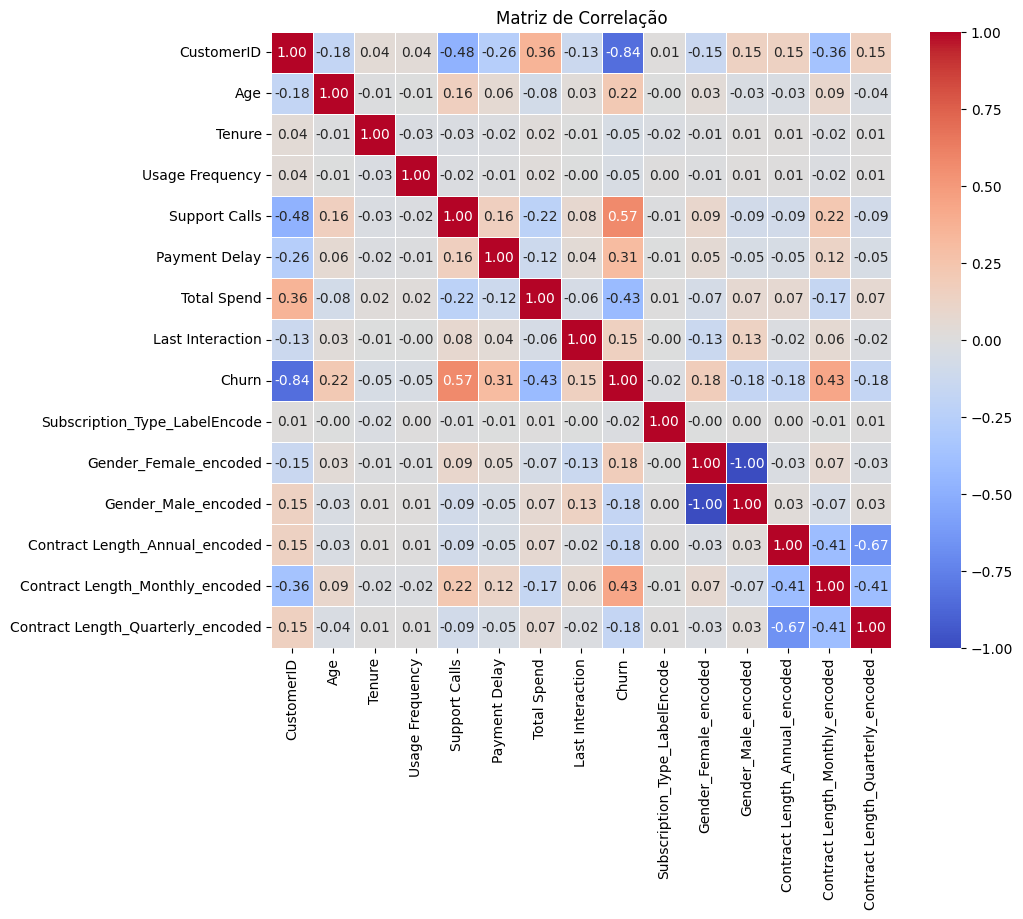

In [33]:
#correlação
correlacao = df.corr()

# Cria um mapa de calor (heatmap) usando o Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

grandes correlações com churn:
support calls - quanto mais ligações de suporte o cliente tem, mais as chances de churn
payment delay -quanto mais demora no pagamento mais chances de churn
Total spend - quanto menor o valpr gasto no total pelo customer mais chances de churn -se o cliente renovou mais vezes, ele não vai dropar
Monthly- se é monthly a chance de churn é maior

In [34]:
# Agora que vimos a correlação entre as variáveis, vamos dropar uma das colunas de gênero e uma das de contract length
# pq se não tiramos dá um problema de colinearidade perfeita
df.drop(columns=['Gender_Male_encoded','Contract Length_Quarterly_encoded'], inplace=True)

In [35]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription_Type_LabelEncode,Gender_Female_encoded,Contract Length_Annual_encoded,Contract Length_Monthly_encoded
count,440833.000000,440833.000000,440833.000000,440833.000000,440833.000000,440833.000000,440833.000000,440833.000000,440833.000000,440833.000000,440833.000000,440833.000000,440833.000000
mean,225398.669604,39.373153,31.256337,15.807494,3.604435,12.965719,631.616289,14.480867,0.567108,1.012821,0.432318,0.401964,0.197590
std,129531.771637,12.442355,17.255708,8.586232,3.070215,8.258053,240.802732,8.596198,0.495477,0.813356,0.495399,0.490295,0.398181
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,113622.000000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,337739.000000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000,2.000000,1.000000,1.000000,0.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000,2.000000,1.000000,1.000000,1.000000


Vimos uma forte correlação negativa com a coluna de CustomerID - então, supomos que a primeira metade do df estaria com valores 1 pra churn e a 2 metade  com valores de zero
Então, como o df tem 440.833 linhas, dividimos metade pra ver a soma de linhas com churn que teria

In [36]:
#numero total customers que tiveram churn
df['Churn'].sum()

250000.0

In [37]:
(df.head(220416)['Churn'].sum()/df['Churn'].sum())

0.867128

In [38]:
df.tail(220416)['Churn'].sum()/df['Churn'].sum()

0.132868

Dá pra ver que metade do df tem quase todo o total de churn(86%), e a outra metade tem muito pouco(13%), por isso temos uma grande correlação entre churn e customer ID, pois essa coluna está ordenada de forma crescente. Então, customers ID menores, possuem maior percentual de churn.
Desse modo, vamos dropar a coluna Customer ID

In [39]:
df.drop(columns='CustomerID',inplace=True)

In [40]:
#vamos embaralhar o df para não enviesar o aprendizado de máquina - não deu certo - deu 100% acurácia
###df = df.sample(frac=1, random_state=42).reset_index(drop=True)


### Data split
Para um algoritmo de Machine Learning funcionar, é necessário que ele primeiro aprenda com uma certa quantidade dos dados disponíveis a identificar padrões. A esse conjunto, chamamos de "treino".

Após o treino, é necessário verficar como ele lida diante de novos dados. Esse conjunto com a outra parte dos dados, chamamos de "teste". Sendo assim, divida seu dataset em treino e teste.

In [41]:
from sklearn.model_selection import train_test_split


In [62]:
# Separar as características (X) e o alvo (y)
X = df[["Age", "Tenure", "Usage Frequency", "Support Calls", "Payment Delay", "Total Spend", "Last Interaction", "Churn", "Subscription_Type_LabelEncode", "Gender_Female_encoded", "Contract Length_Annual_encoded", "Contract Length_Monthly_encoded"]]
y = df['Churn']

# Dividir o conjunto de dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Exibir o tamanho dos conjuntos de treino e teste
print(f"Tamanho do conjunto de treino: {len(X_train)}")
print(f"Tamanho do conjunto de teste: {len(X_test)}")

Tamanho do conjunto de treino: 308583
Tamanho do conjunto de teste: 132250


### Scaling
Último ponto dessa etapa. Veja que as variáveis possuem escalas diferentes. Enquanto algumas variáveis estão na casa das dezenas, outras estão na casa das centenas. Isso pode ser um problema para alguns algoritmos de Machine Learning, que podem acabar dando mais importância para as variáveis com maior escala. Transforme seus dados de modo com que fiquem na mesma escala

Dica: se achar necessário, pesquise mais afundo sobre métodos de dimensionamento como Min-Max Scaler e Standard Scaler, identificando as aplicações de cada um e qual se encaixa melhor no seu problema

pesquisar melhor qual a diferença

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [64]:

# Inicializar e aplicar a padronização (Z-score normalization) nos conjuntos de treino e teste
scaler = StandardScaler()

# Normalizar o conjunto de treino
X_train_normalized = scaler.fit_transform(X_train)

# Normalizar o conjunto de teste usando as estatísticas do conjunto de treino
X_test_normalized = scaler.transform(X_test)

# Exibir os conjuntos normalizados
print("Conjunto de Treino Normalizado:")
print(X_train_normalized)

print("\nConjunto de Teste Normalizado:")
print(X_test_normalized)

Conjunto de Treino Normalizado:
[[-1.0744924   0.15905048  1.3021874  ... -0.87322718  1.2199227
  -0.4955066 ]
 [ 1.33874527 -1.29013029  0.13803071 ...  1.14517737 -0.81972407
   2.01813657]
 [ 1.98227531 -0.13078567  1.3021874  ...  1.14517737 -0.81972407
  -0.4955066 ]
 ...
 [-0.18963859 -1.29013029 -1.37537297 ...  1.14517737 -0.81972407
   2.01813657]
 [-0.51140361 -0.24672013 -1.25895731 ... -0.87322718  1.2199227
  -0.4955066 ]
 [ 0.93653899  1.43432956  1.18577173 ...  1.14517737  1.2199227
  -0.4955066 ]]

Conjunto de Teste Normalizado:
[[-0.99405114 -1.00029414  1.41860307 ... -0.87322718 -0.81972407
   2.01813657]
 [ 0.05168518 -0.71045798 -1.60820431 ... -0.87322718 -0.81972407
   2.01813657]
 [-0.99405114  1.49229679 -1.49178864 ...  1.14517737  1.2199227
  -0.4955066 ]
 ...
 [ 1.8213928  -0.07281844 -0.5604633  ... -0.87322718  1.2199227
  -0.4955066 ]
 [-0.99405114 -0.71045798  0.37086205 ...  1.14517737 -0.81972407
   2.01813657]
 [ 0.69521523 -1.17419583 -0.5604633  .

### 2 - Criação do modelo

Existem dois principais tipos de problemas de ML: regressão e classificação. Enquanto o primeiro se refere à previsão de valores numéricos, o segundo, como o nome já diz, se refere à classificação de valores em categorias.

Para classificação, existem alguns algoritmos mais comuns que você pode tentar:

Cursos:
- [Supervised Learning with scikit-learn - DataCamp](https://app.datacamp.com/learn/courses/machine-learning-with-scikit-learn)
- [Linear Classifiers in python - DataCamp](https://app.datacamp.com/learn/courses/linear-classifiers-in-python)

Vídeos:
- [Vídeo da Dev sobre Random Forest](https://www.youtube.com/watch?v=ho1eI54ykoU&pp=ygUHZmVhIGRldg%3D%3D)
- [StatsQuest: LogisticRegression (teoria)](https://www.youtube.com/watch?v=yIYKR4sgzI8)
- [StatsQuest: KNN (teoria)](https://www.youtube.com/watch?v=HVXime0nQeI&pp=ugMICgJwdBABGAE%3D)


Escolha pelo menos dois modelos. Treine e teste com os dados que você separou anteriormente e gere as previsões

Vamos escolher o modelo de classificação. Suas categorias:
O objetivo é prever a qual categoria ou classe uma observação pertence.
As variáveis de saída são categóricas ou discretas.
Exemplos de problemas de classificação incluem prever se um e-mail é spam ou não, classificar imagens em categorias específicas, ou prever se um cliente irá ou não cancelar um serviço.

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [66]:
# Inicializar o modelo k-NN
knn_model = KNeighborsClassifier(n_neighbors=3)

# Treinar o modelo
knn_model.fit(X_train, y_train)

# Fazer previsões
y_pred = knn_model.predict(X_test)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [68]:
# Inicializar e treinar o modelo de Regressão Logística
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train.ravel())

# Fazer previsões no conjunto de teste
y_pred2 = logistic_model.predict(X_test)

c:\Users\natal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 3 - Avaliação do modelo

Uma vez feitas as previsões, é preciso verificar o quão próximas da realidade elas foram. Para problemas de classificação, as métricas mais comuns de se utilizar são: acurácia, precisão e AUC. Você pode ter uma melhor visualização nesse cheat sheet:

<p align='center'>
    <img src='https://miro.medium.com/v2/resize:fit:828/format:webp/1*wEniP5HewaUSHeIF1_bEiw.png'>

Para um entendimento mais profundo sobre cada uma das métricas, seguem também algumas referências:

- [StatsQuest: ROC e AUC](https://www.youtube.com/watch?v=4jRBRDbJemM&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=7)
- [StatsQuest: Confusion Matrix](https://www.youtube.com/watch?v=Kdsp6soqA7o&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=3)
- [12 Important Model Evaluation Metrics for Machine Learning Everyone Should Know ](https://www.analyticsvidhya.com/blog/2019/08/11-important-model-evaluation-error-metrics/)

**Avalie as previsões do seu modelo e veja qual deles se saiu melhor.**

In [69]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo k-NN: {accuracy:.2f}')

Acurácia do modelo k-NN: 0.89


![a](https://media.brainly.com.br/image/rs:fill/w:750/q:75/plain/https://pt-static.z-dn.net/files/d29/6f425c89c76b49eaf53066fefc59e1f3.png)

acurácia=n previsões corretas/n previsões falsas

Acurácia: 1.00


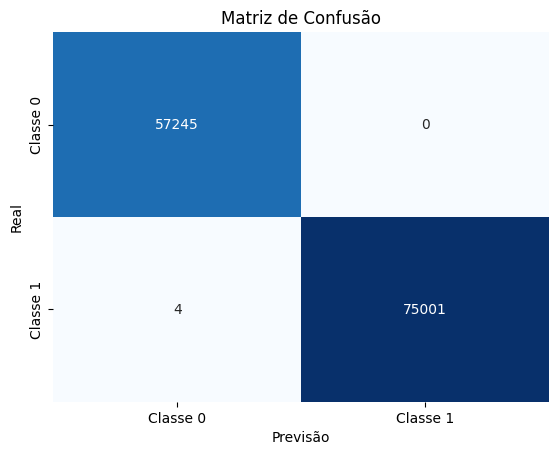

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     57245
         1.0       1.00      1.00      1.00     75005

    accuracy                           1.00    132250
   macro avg       1.00      1.00      1.00    132250
weighted avg       1.00      1.00      1.00    132250



In [70]:
# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred2)

# Exibir a acurácia
print(f'Acurácia: {accuracy:.2f}')

# Exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# Exibir o relatório de classificação
class_report = classification_report(y_test, y_pred2)
print('Relatório de Classificação:\n', class_report)


### 4 - Otimização do modelo
Cada função do scikit-learn na verdade tem vários parâmetros que podem ser ajustados a depender dos seus dados e do seu objetivo e nem sempre os valores padrão são os melhores. O processo de otimização desses hiperparâmetros nada mais é do que iterar sobre as diferentes possibilidades de valores que esses parâmetros podem assumir e ver qual combinação deles gera o melhor resultado.

A forma mais comum de realizar essa otimização é através do GridSearchCV, mas a biblioteca Optuna também é uma excelente opção.

O capítulo 3 do curso de Supervised Learning oferece um guia de como realizar esse processo - https://app.datacamp.com/learn/courses/supervised-learning-with-scikit-learn

**Realize a otimização dos hiperparâmetros**

### Hyperparameter tunning